In [1]:
import os
import ebf
import numpy as np
from matplotlib import pyplot as plt
from c_functions import bin as _bin, integerize as _int

In [2]:
halo_ebf_dir = os.path.join(os.environ['HOMEPATH'], 'Desktop', 'halo_ebf')
halo_filehandels = os.listdir(halo_ebf_dir)
halo_filehandels

['halo02.ebf',
 'halo05.ebf',
 'halo07.ebf',
 'halo08.ebf',
 'halo09.ebf',
 'halo10.ebf',
 'halo12.ebf',
 'halo14.ebf',
 'halo15.ebf',
 'halo17.ebf',
 'halo20.ebf']

In [88]:
halo_fh = halo_filehandels[-2]
halo = ebf.read(os.path.join(halo_ebf_dir, halo_fh))

In [57]:
def fix_rslice(grid, rslices=[14]):
    
    #center = grid.shape[0] / 2
    ratio = (2.0 * 300.0 / 600.0) #(1.0 * Config.getint('grid_options', 'size'))
    #x_bump, y_bump = np.nonzero(grid[295:305, 295:305, 0] == grid[295:305, 295:305, 0].max())
    x_center = (grid.shape[1] / 2) #+ (10 - x_bump[0])
    y_center = (grid.shape[0] / 2) #+ (10 - y_bump[0])
    # if VERBOSE:
    # print('fixing radial data slice')
    # print('ratio: ', ratio)
    # print('slices: ', rslices)
    # print('center:', center)
    for r in rslices:
        for i in range(grid.shape[0]):
            for q in range(grid.shape[1]):
                value = np.sqrt(
                    (np.square(i - y_center) + np.square(q - x_center)))
                value /= ratio
                if value > 300.0:
                    value = 0.0
                grid[i, q, r] = value
    return grid

In [115]:
os.environ.keys()

['TMP',
 'COMPUTERNAME',
 'USERDOMAIN',
 'CONDA_PREFIX',
 'PSMODULEPATH',
 'COMMONPROGRAMFILES',
 'PROCESSOR_IDENTIFIER',
 'PROGRAMFILES',
 'PROCESSOR_REVISION',
 'SYSTEMROOT',
 'PATH',
 'CLICOLOR',
 'PROGRAMFILES(X86)',
 'TK_LIBRARY',
 'TERM',
 'TEMP',
 'COMMONPROGRAMFILES(X86)',
 'PROCESSOR_ARCHITECTURE',
 'TIX_LIBRARY',
 'ALLUSERSPROFILE',
 'LOCALAPPDATA',
 'FPS_BROWSER_USER_PROFILE_STRING',
 'HOMEPATH',
 'USERDOMAIN_ROAMINGPROFILE',
 'JPY_INTERRUPT_EVENT',
 'PROGRAMW6432',
 'USERNAME',
 'LOGONSERVER',
 'MPLBACKEND',
 'COMSPEC',
 'JPY_PARENT_PID',
 'PROGRAMDATA',
 'ONEDRIVE',
 'TCL_LIBRARY',
 'FPS_BROWSER_APP_PROFILE_STRING',
 'GIT_PAGER',
 'SESSIONNAME',
 'PATHEXT',
 'ASL.LOG',
 'WINDIR',
 'APPDATA',
 'HOMEDRIVE',
 'PAGER',
 'SYSTEMDRIVE',
 'NUMBER_OF_PROCESSORS',
 'PROCESSOR_LEVEL',
 'COMMONPROGRAMW6432',
 'OS',
 'PUBLIC',
 'IPY_INTERRUPT_EVENT',
 'USERPROFILE']

In [4]:
data_dir = ''
for pth in os.path.abspath(os.path.curdir).split('\\')[:-1]:
    data_dir = os.path.join(data_dir, pth)
data_dir = os.path.join(data_dir, 'data')
data_dir

'C:Users\\swc21\\GitHub\\starcat\\data'

In [83]:
px, py = _int(halo['px'].astype(np.float64), halo['py'].astype(np.float64))
ab_mags = halo['wfirst-hst_h158'].astype(np.float64)
ap_mags = abmags + (5 * np.log10(4.0 * 1e5))
r_proj = np.sqrt(np.square(halo['px']) + np.square(halo['py'])).astype(np.float64)
lims = np.array([27.0, 28.0, 29.0], dtype=np.float64)

-------------------------------------------------------------------------------------

 [ integerize ] 

[ before ] px min, mean, max :  -299.56463623 , 5.17318378486 , 299.311065674
 [ after ] px min, mean, max :  0 , 304.682929013 , 599
[ before ] py min, mean, max :  -299.390106201 , -2.55339492394 , 299.248931885
 [ after ] py min, mean, max :  0 , 296.941679635 , 599


In [84]:
grid = _bin(px, py, ab_mags, ap_mags, r_proj, lims, halo['satid'].astype(np.int32))

-------------------------------------------------------------------------------------

 [ bin ] 

sample px and py before starting bin loop:
  ->  [290 308 279 298 322 328 307 297 366 358]
  ->  [302 402 331 273 343 342 300 292 277 275]


threads :  26
mlim_min:  27.0
mlim_med:  28.0
mlim_max:  29.0

-------------------------------
    bound stars:  1218673
  unbound stars:  12026440
percent unbound:  90.8 %
   binned stars:  13245113
    total stars:  13245116
   missed stars:  3
-------------------------------



In [113]:
# box coord set making function
def make_boxe(xy, size=100):
    '''

    '''
    x, y = xy
    x += 300
    y += 300
    segment = (size * 0.5)
    return ((x - segment, x + segment), (y - segment, y + segment))

# box placing function
def place_box(_ax, _box, _boxid):
    '''
    _ax is the subplot to plot on
    _box is ((x0, x1), (y0, y1))
    _boxid is the box ID
    
    make a single box from a set of numbers like this: box = ((x0, x1), (y0, y1))
    _ax.vlines(x0, y0, y1)
    _ax.vlines(x1, y0, y1)
    _ax.hlines(y0, x0, x1)
    _ax.hlines(y1, x0, x1)
    '''
    # unpack box tuples
    _age, _feh = _box
    
    # find box center
    a_center = _age[0] + ((_age[1] - _age[0]) * 0.5)
    f_center = _feh[1] + ((_feh[1] - _feh[0]) * 0.5)
    
    # set box label
    box_label = 'R ' + str(_boxid)
    _ax.text(a_center, f_center, box_label, 
             ha='center', 
             fontsize=10, 
             color='k', 
             bbox={'facecolor':'white', 'alpha':0.75, 'pad':2})
    
    # params
    lwidth = 3
    lstyle = 'dashed'
    lclr = 'r'
    aph = .3
    
    # set lines
    _ax.vlines(_age[0], _feh[0], _feh[1], 
               colors=lclr, 
               linestyles=lstyle,
               alpha = aph,
               linewidth=lwidth)
    _ax.vlines(_age[1], _feh[0], _feh[1], 
               colors=lclr, 
               linestyles=lstyle,
               alpha = aph,
               linewidth=lwidth)
    _ax.hlines(_feh[0], _age[0], _age[1], 
               colors=lclr, 
               linestyles=lstyle,
               alpha = aph,
               linewidth=lwidth)
    _ax.hlines(_feh[1], _age[0], _age[1], 
               colors=lclr, 
               linestyles=lstyle,
               alpha = aph,
               linewidth=lwidth)


C:\Users\swc21\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log10


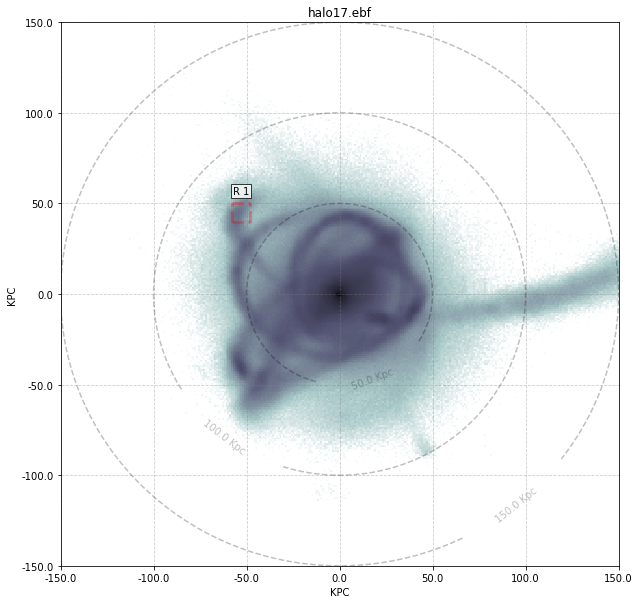

In [114]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)
ax.set_title(halo_fh)
ticks = [str(i) for i in np.linspace(-150, 150, 7)]

ax.set_xlabel('KPC')
ax.set_xticklabels(ticks)
ax.set_ylabel('KPC')
ax.set_yticklabels(ticks)

# fill radius gridslice
grid = fix_rslice(grid)

ax.pcolormesh(np.log10(grid[8:, :-3, 0]), cmap=plt.cm.bone_r, vmin=1.0, vmax=4.5)
cp = ax.contour(grid[:, :, 14], [50, 100, 150, 300], colors='k',linewidths=1.5, alpha=.25, linestyles='dashed')
cl = ax.clabel(cp, [50, 100, 150, 300], inline=1, fmt='%s Kpc', fontsize=10, color='k', linewidth=50, alpha=1)

# limits
center = grid.shape[0] / 2
include = center / 2
lim0 = center + include
lim1 = center - include
ax.set_xlim([lim1, lim0])
ax.set_ylim([lim1, lim0])

# boxes
box = make_boxe((-53,45), size=10)
place_box(ax, box, 1)

ax.axes.grid(alpha=.4, linestyle='dashed',color='grey')
fig.savefig(os.path.join(os.path.curdir, halo_fh.split('.')[0] + '.png'), dpi=800)
plt.show()

In [ ]:
plt.cm.

In [123]:
box = [1]

In [124]:
if box:
    print 'hi'

hi
